FEUILLE DE TP 4

---
# Polynôme interpolateur de Lagrange (Partie 1)
---

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
from scipy.interpolate import lagrange   # interpolation de Lagrange
import matplotlib.pyplot as plt          # librairie graphique
import random as rand

Nous rappelons le résultat d'existence et d'unicité vu en cours

> **(Polynôme interpolateur de Lagrange)**<br>
> Etant donnés $N$ un entier strictement positif, $x_1,\ldots,x_N$ des réels deux à deux distincts et $y_1,\ldots,y_N$ des réels, il existe un unique polynôme $P$ qui vérifie
> $$ P\in\mathbb{R}_{N-1}[X], \qquad P(x_i)=y_i, \quad 1\leq i\leq N.$$

## Construction en utilisant les modules `numpy` et `scipy`

Le module `numpy` permet la manipulation de polynômes réels à l'aide de la classe `poly1d`. Voici un exemple pour le polynôme $P=X^2-2$

```python
P = np.poly1d([1, 0, -2])
print(P)
```

Il est possible de faire des manipulations algébriques sur les polynômes :

```python
X = np.poly1d([1, 0])
P = X**2 - 2
print(P)
```

Il est également possible d'évaluer un polynôme comme une fonction (évaluation sur un scalaire ou sur un tableau `numpy`) :

```python
print(P(1))
print(P(np.linspace(0, 1, 11)))
```

In [48]:
P = np.poly1d([1, 0, -2])
print(P)

   2
1 x - 2


In [49]:
X = np.poly1d([1, 0])
P = X**2 - 2
print(P)

   2
1 x - 2


In [50]:
print(P(1))
print(P(np.linspace(0, 1, 11)))

-1
[-2.   -1.99 -1.96 -1.91 -1.84 -1.75 -1.64 -1.51 -1.36 -1.19 -1.  ]


Le module `scipy.interpolate` permet de déterminer le polynôme interpolateur à l'aide de la fonction `lagrange`. Voici un exemple d'utilisation pour déterminer le polynôme interpolateur de Lagrange aux points $(0, -2)$, $(1,-1)$ et $(2, 2)$ (c'est encore et toujours le polynôme $X^2-2$...)

```python
from scipy.interpolate import lagrange
x = np.array([0, 1, 2])
y = np.array([-2, -1, 2])
P = lagrange(x, y)
print(P)
```

In [51]:
from scipy.interpolate import lagrange
x = np.array([0, 1, 2])
y = np.array([-2, -1, 2])
P = lagrange(x, y)
print(P)

   2
1 x - 2


**Question**

> Proposez une fonction `interp` qui 
> * prend en argument deux `ndarray` `x` et `y` de taille `N` et un `ndarray` `xx` de taille `M` ;
> * calcule le polynôme interpolateur de Lagrange aux points donnés par les vecteurs `x` et `y` en utilisant les fonctions des modules `numpy` et `scipy` ;
> * retourne l'évaluation de ce polynôme aux points du vecteur `xx`.

*Veillez à commenter votre fonction.*

In [52]:
def interp(x,y,xx):
    Pscipy = lagrange(x,y)
    return Pscipy(xx)

**Question**

> Afin de tester votre fonction : en prenant $N=5$,
> 1. prenez $N$ points équirépartis entre 0 et 1 (ce sera notre vecteur `x`) ;
> 2. générez $N$ valeurs aléatoires entre 0 et 1 (ce sera notre vecteur `y`) ;
> 3. tracez dans une fenêtre graphique le nuage de points d'abscisses `x` et d'ordonnées `y` à l'aide d'une commande `scatter` ;
> 4. ajoutez le tracé du polynôme interpolateur en prenant `xx` un vecteur de taille grande (plutôt 100 ou 200 points équi-répartis entre 0 et 1) ;
> 5. vérifiez que le polynôme interpolateur passe bien par les points d'interpolation.

In [53]:
N = 5
x = np.linspace(0,1,N)
y = np.random.rand(N)
xx = np.linspace(0,1,100)
yy = interp(x,y,xx)

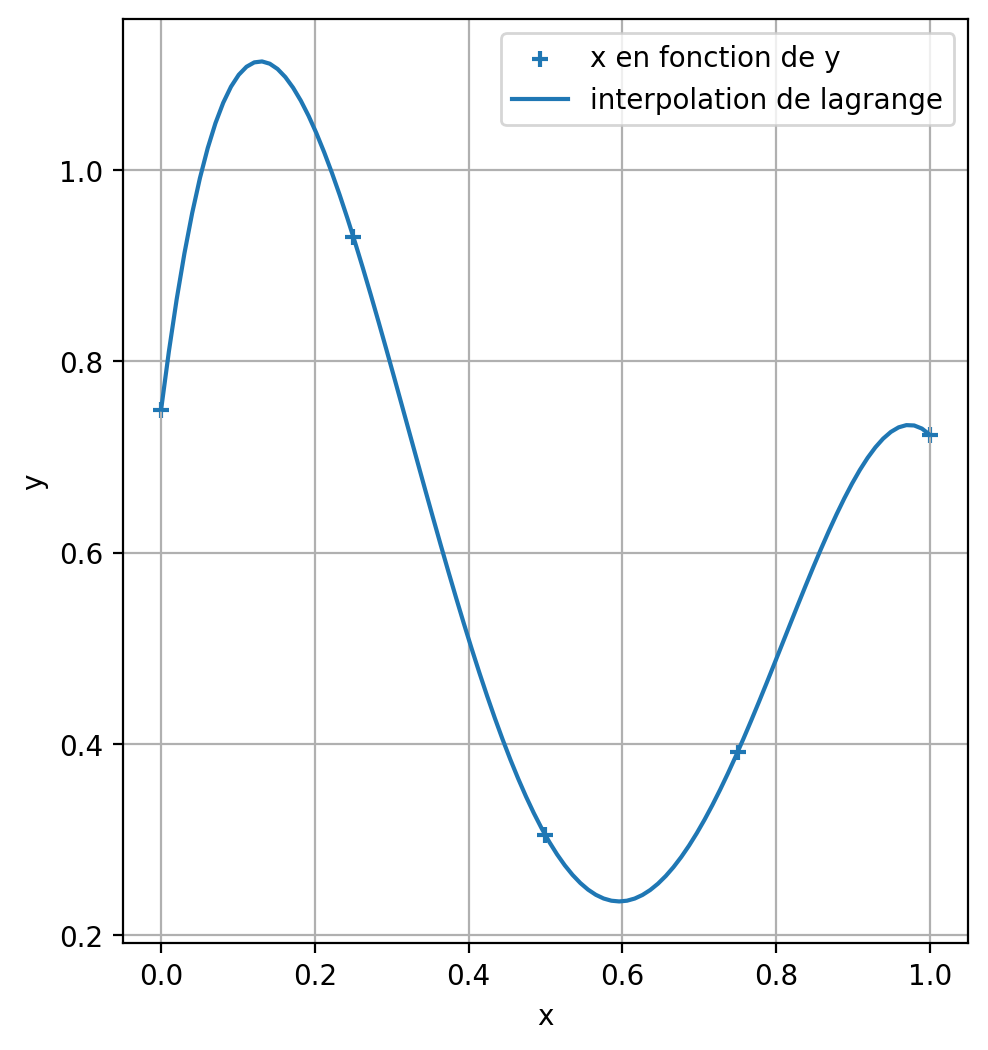

In [54]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 2)

ax.scatter(x,y,label='x en fonction de y', marker = '+')
ax.plot(xx,yy,label = 'interpolation de lagrange')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

## Test de l'interpolation sur quelques fonctions

Nous allons à présent tester l'interpolation en prenant comme points d'interpolation des points qui sont sur le graphe de ces 4 fonctions. 

\begin{align}
f_0(x) &= \exp(-3(x-1.2)^2), &
f_1(x) &= \frac{x^2-2}{1+2x},\\
f_2(x) &= \frac{1}{1+(x-1.5)^2},&
f_3(x) &= \frac{\sin(2\pi x)}{1.1 - \sin(\pi x)}.
\end{align}

**Question**

> Définissez ces 4 fonctions et tracez les sur l'intervalle $[0, 3]$.

In [55]:
f = [
    lambda x : np.exp(-3*pow((x-1.2),2)),
    lambda x : (pow(x,2)-2)/(1+2*x),
    lambda x : 1/(1+pow((x-1.5),2)),
    lambda x : np.sin(2*np.pi*x)/(1.1 - np.sin(np.pi*x))  
]

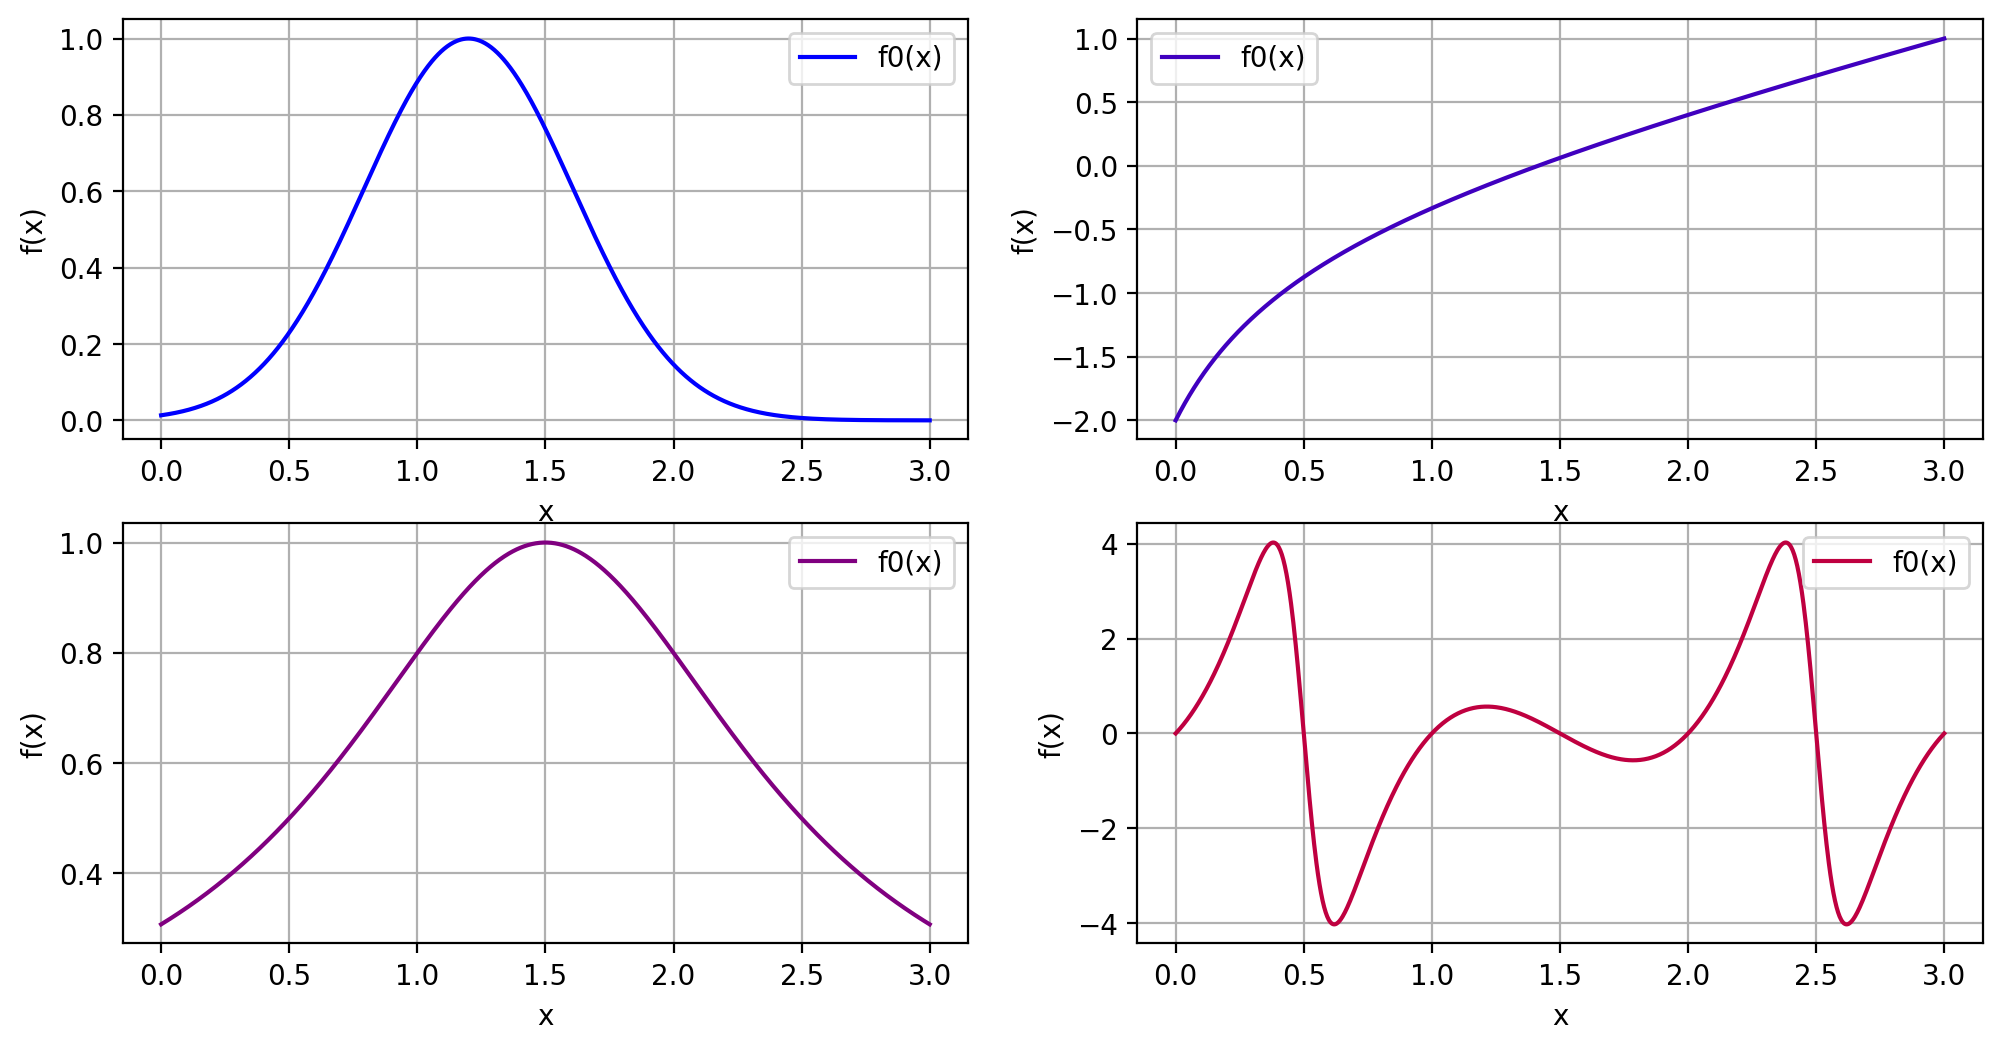

In [56]:
xx = np.linspace(0,3,1000)

fig = plt.figure(figsize=(12, 6))
for i,fi in enumerate(f):
    couleur = (i/len(f), 0, 1 - i/len(f))
    ax = fig.add_subplot(2, 2, i+1)
    ax.plot(xx,fi(xx),label='f0(x)',color=couleur)
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()

**Question**

> * Ajoutez sur les figures précédentes les polynômes interpolateurs qui passent par $N$ points équi-répartis des graphes des fonction avec $N\in\lbrace 4, 8, 12, 16, 20\rbrace$.
> * Que remarquez-vous lorsque $N$ augmente ?

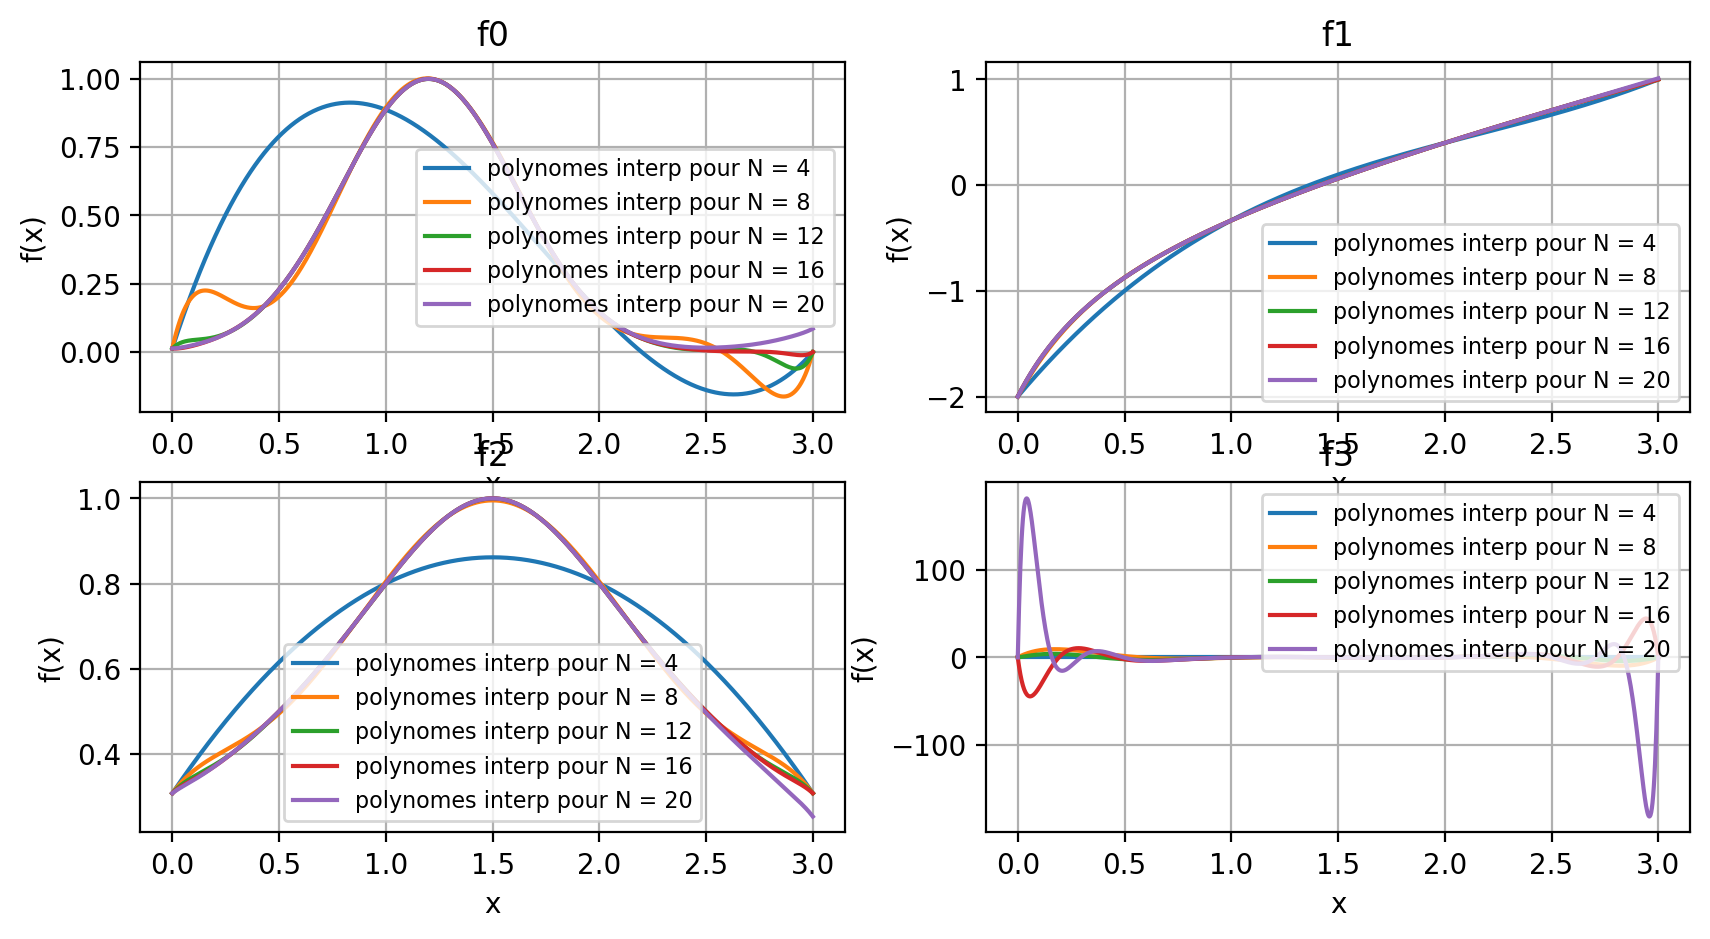

In [59]:
list_N = [4,8,12,16,20]

fig = plt.figure(figsize=(10, 5))

for i,fi in enumerate(f):
    ax = fig.add_subplot(2, 2, i+1)
    ax.grid(True)
    for N in list_N:
        x = np.linspace(0,3,N)
        y = fi(x)
        yy = interp(x,y,xx)
        ax.plot(xx,yy,label = f'polynomes interp pour N = {N}')
        ax.grid(True)
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(f'f{i}')
        ax.legend(fontsize = 8)

Nous rappelons le résultat d'existence et d'unicité vu en cours

> **(Polynôme interpolateur de Lagrange)**<br>
> Etant donnés $N$ un entier strictement positif, $x_1,\ldots,x_N$ des réels deux à deux distincts et $y_1,\ldots,y_N$ des réels, il existe un unique polynôme $P$ qui vérifie
> $$ P\in\mathbb{R}_{N-1}[X], \qquad P(x_i)=y_i, \quad 1\leq i\leq N.$$

## Construction par la méthode de la matrice de Vandermonde

Nous rappelons que le vecteur $a=(a_1,\ldots,a_N)$des coefficients du polynôme interpolateur de Lagrange dans la base canonique de $\mathbb{R}_{N-1}[X]$ est solution du système linéaire
$$ M a = y$$
où $M$ est la matrice de Vandermonde associée aux points $(x_1,\ldots, x_N)$ et $y=(y_1,\ldots,y_N)$.
Nous avons
$$
M = \begin{pmatrix}
1&x_1&\ldots&x_1^{N-1}\\
1&x_2&\ldots&x_2^{N-1}\\
\vdots&\vdots&&\vdots\\
1&x_N&\ldots&x_N^{N-1}
\end{pmatrix}.
$$

**Question**

> 1. Proposez une fonction `interp_vdm_build` qui prend en argument un `ndarray` noté `x` et qui retourne la matrice de Vandermonde associée.
> 2. Proposez une fonction `interp_vdm_poly` qui 
>    * prend en argument deux `ndarray` notés `x` et `y` ;
>    * vérifie que les deux arguments ont bien la même taille ;
>    * calcule la matrice de Vandermonde `M` associée au vecteur `x` ;
>    * retourne la solution du système `Ma=y`.
> 3. Vérifiez que vos fonctions fonctionnent correctement en affichant les résultats pour des points bien choisis (vous pouvez prendre ce que vous voulez...)

*Indication : vous pourrez utiliser la fonction `fromfunction` du module `numpy`, la fonction `solve` du module `numpy.linalg`.*

In [2]:
def interp_vdm_build (x):
    """
    fonction qui prend en argument x et qui retourne la matrice M associé
    
    Pramètre:
    --------
    
    x = vecteur de taille N 
    
    return 
    ------
    
    M = matrice de Vandermonde associé au vecteur x
    """
    N = len(x)
    M = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            M[i,j] = pow(x[i],j)
    return M

def interp_vdm_poly(x,y):
    """
    fonction qui prend en argument x et y et qui retourne la solutionde Ma = y
    
    Pramètre:
    --------
    
    x = vecteur de taille N 
    
    y = vecteur de taille N
    
    M = matrice de Vandermonde associé a x
    
    return 
    ------
    
    sol = la solution de Ma = y
    """
    if x.size == y.size:
        M = interp_vdm_build(x)
        sol = np.linalg.solve(M,y)
    return sol


**Question**

> 1. Proposez une fonction `horner` qui prend en argument un `ndarray` noté `a` et un `ndarray` noté `xx` et qui retourne l'évaluation aux points du vecteur `xx` par l'algorithme de Hörner du polynôme dont les coefficients dans la base canonique sont stockés dans le vecteur `a`.
> 2. Proposez une fonction `interp_vdm` qui 
>    * prend en argument deux `ndarray` `x` et `y` de taille `N` et un `ndarray` `xx` de taille `M` ;
>    * calcule le polynôme interpolateur de Lagrange aux points donnés par les vecteurs `x` et `y` en utilisant la fonction `interp_vdm_poly` ;
>    * retourne l'évaluation de ce polynôme aux points du vecteur `xx` en utilisant la fonction `horner`.

In [3]:
def horner(a,xx):
    yy = 0
    for ak in a[::-1]:
        yy *= xx
        yy += ak
    return yy

def interp_vdm(x, y, xx):
    if x.size != y.size:
        raise ValueError('x et y ne sont pas de la même taille ')
    a = interp_vdm_poly(x, y)
    return horner(a, xx)

**Question**

> Afin de tester votre fonction : en prenant $N=5$,
> 1. prenez $N$ points équirépartis entre 0 et 1 (ce sera notre vecteur `x`) ;
> 2. générez $N$ valeurs aléatoires entre 0 et 1 (ce sera notre vecteur `y`) ;
> 3. tracez dans une fenêtre graphique le nuage de points d'abscisses `x` et d'ordonnées `y` à l'aide d'une commande `scatter` ;
> 4. ajoutez le tracé du polynôme interpolateur en prenant `xx` un vecteur de taille grande (plutôt 100 ou 200 points équi-répartis entre 0 et 1) ;
> 5. vérifiez que le polynôme interpolateur passe bien par les points d'interpolation.

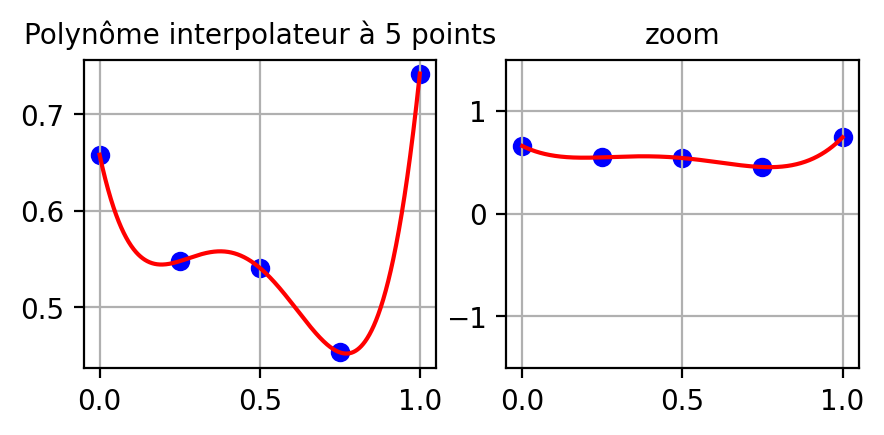

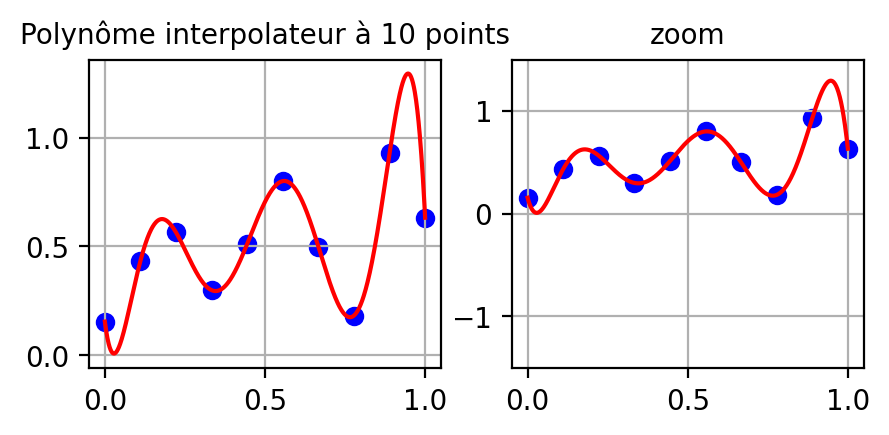

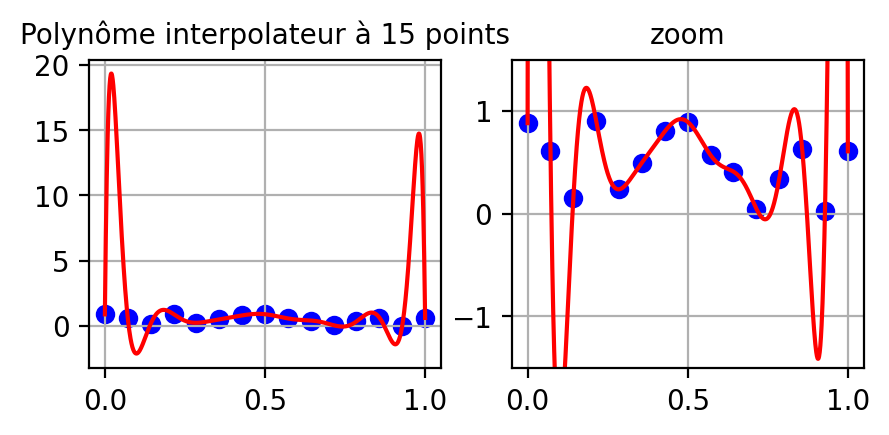

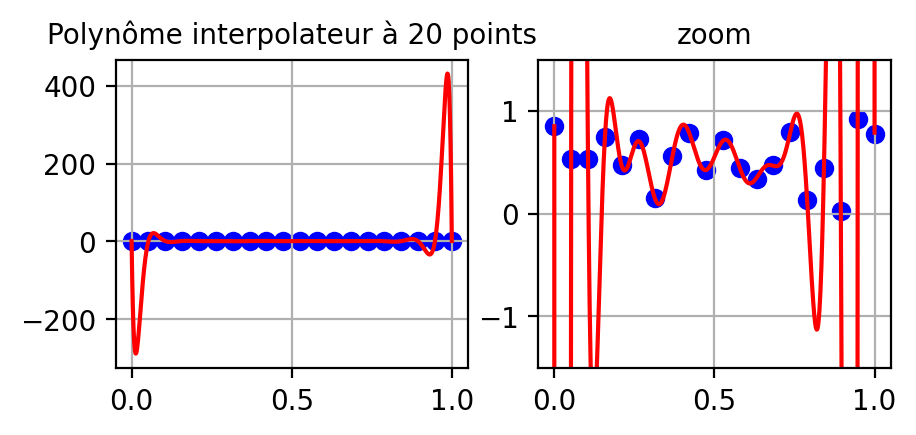

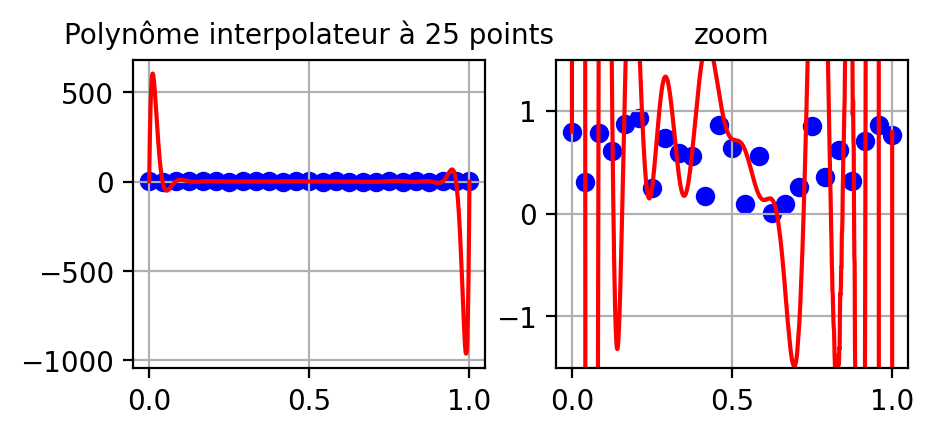

In [10]:
for N in range(5, 30, 5):
    x = np.linspace(0, 1, N)
    y = np.random.rand(N)
    xx = np.linspace(0, 1, 1025)
    yy = interp_vdm(x, y, xx)

    fig = plt.figure(figsize=(5, 2))
    ax = fig.add_subplot(1, 2, 1)
    ax.grid(True)
    ax.scatter(x, y, color='b')
    ax.plot(xx, yy, color='r')
    ax.set_title(f"Polynôme interpolateur à {N} points", fontsize=10)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(x, y, color='b')
    ax.grid(True)
    ax.plot(xx, yy, color='r')
    ax.set_ylim(-1.5, 1.5)
    ax.set_title("zoom", fontsize=10)